In [22]:
# Any data preprocessing occurs in this notebook
import torch
import torchvision
from torchvision import transforms
pre_process = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_data = torchvision.datasets.CIFAR100('data/train', train=True, download=False, transform=pre_process)
test_data = torchvision.datasets.CIFAR100('data/test', train=False, download=False, transform=pre_process)

In [23]:
print(train_data)
print(test_data)

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data/train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: data/test
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


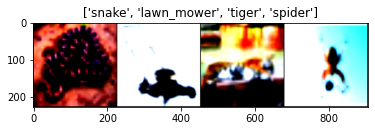

In [25]:
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
test_loader = DataLoader(test_data, batch_size=4, shuffle=True)
class_names = test_data.classes
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(test_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])